# Học quy nạp
Học hàm tổng quát hóa từ các mấu quan sát được được gọi là ** học quy nạp **.

Từ một tập dữ liệu đã biết trước $ D = \{(x_1,y_1), (x_2,y_2),...,(x_3,y_3)\} $, 
ta cần tìm ra hàm ánh xạ $ f: X \rightarrow Y $ sao cho:
\begin{equation*} f(x) = y, \, \forall x \in D \end{equation*}

Trong các bài toán thực tế, ta rất ít khi tìm được hàm ánh xạ $f(x)$ cho ra dự đoán chính xác 100% so với dữ liệu, do vậy, bài toán học quy nạp trở thành bài toán tìm hàm ánh xạ tốt nhất trong tập ánh xạ có thể có.

Tập dữ liệu $D$ biết trước được gọi là tập huấn luyện hay tập đào tạo.

Trong bài học này, chúng ta sẽ tiến hành minh họa các khái niệm cơ bản của học quy nạp dựa trên bài toán thực tế: Phân lớp hoa cẩm chướng.

### Dữ liệu
Trong bài toán học máy, dữ liệu huấn luyện là một phần quan trọng không thể thiếu. Từ dữ liệu, chúng ta sẽ học được hàm ánh xạ để phân loại dữ liệu.

Với bài toán phân lớp hoa cẩm chướng, ta sử dụng dữ liệu $iris$ trong package $scikit-learn$.

In [1]:
import numpy as np
from sklearn import datasets
# TODO: import dữ liệu iris từ datasets của scikit-learn
iris = datasets.load_iris()

# Hiển thị mô ta dữ liệu
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

Trong tập dữ liệu Hoa cẩm chướng gồm có 150 mẫu. Mỗi mẫu biểu diễn một đối tượng thông qua các đặc trưng bao gồm:
- độ dài lá (sepal length), 
- độ rộng lá (sepal width),
- độ dài cánh hoa (petal length),
- và độ rộng cánh hoa (petal width).

Tập dữ liệu trên thuộc về 3 lớp lần lượt là *Setosa*, *Versicolour* và *Virginica*, mỗi lớp bao gồm 50 mẫu.

**Bài tập:** Tách tập dữ liệu $iris$ thành tập dữ liệu huấn luyện và dữ liệu kiểm tra theo tỉ lệ 80:20.
Gợi ý: Dùng hàm `train_test_split` trong `sklearn.model_selection` để chia dữ liệu.

In [2]:
from sklearn.model_selection import train_test_split
# TODO: Từ tập dữ liệu ban đầu, tách lấy ma trận biểu diễn các đặc trưng và nhãn.
data = iris.data
target = iris.target

# TODO: Chia dữ liệu và nhãn thành 2 tập dữ liệu huấn luyện và dữ liệu kiểm tra theo tỉ lệ 80:20
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True)

# Để kiểm tra đơn giản, chúng ta in ra kích thước của các tập dữ liệu
print('Train data shape: {}'.format(X_train.shape))
print('Train labels shape: {}'.format(y_train.shape))
print('Test data shape: {}'.format(X_test.shape))
print('Test labels shape: {}'.format(y_test.shape))

# Kết quả của bạn nên đạt được là:
# Train data shape: (120, 4)
# Train labels shape: (120,)
# Test data shape: (30, 4)
# Test labels shape: (30,)

Train data shape: (120, 4)
Train labels shape: (120,)
Test data shape: (30, 4)
Test labels shape: (30,)


In [3]:
from matplotlib import pyplot as plt
# Để trực quan, chúng ta biểu diễn một số ví dụ trong tập dữ liệu.
# Chúng ta hiển thị dữ liệu huấn luyện thuộc về mỗi lớp.

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xticks(())
plt.yticks(())
plt.show()

## Mô hình
Với dữ liệu hoa cẩm chướng, chúng ta sẽ sử dụng mô hình Máy véc-tơ hỗ trợ (SVM) để phân loại dữ liệu. Trong `Scikit-learn`, cần import mô hình `SVC` (Support Vector Classification) cho bài toán này.

Trong khi làm việc với bất cứ mô hình nào, có hai phương thức mà chúng ta cần quan tâm:
- Thứ nhất là phương thức `fit`: huấn luyện mô hình với dữ liệu huấn luyện,
- Thứ hai là phương thức `predict`: sử dụng mô hình đã huấn luyện để phân loại dữ liệu chưa biết.

Các mô hình học máy trong `Scikit-learn` đều có 2 phương thức này (tuy có khác nhau về một số tham số tối ưu mô hình).

** Bài tập:** Sử dụng dữ liệu và hai phương thức trên để huấn luyện mô hình và sử dụng mô hình đó để phân loại dữ liệu kiểm tra.


In [4]:
# import gói SVM
from sklearn import svm

# khởi tạo mô hình phân lớp
clf = svm.SVC()

# TODO: Sử dụng phương thức 'fit' để huấn luyện mô hình với dữ liệu huấn luyện và nhãn huấn luyện
# fit (X,Y) với X là tập các đối tượng, Y là tập nhãn tương ứng của đối tượng.
#pass
clf.fit(X_train,y_train)

# TODO: Sử dụng phương thức 'predict' để phân loại dữ liệu kiểm tra
# predict (X) với X là tập các đối tượng cần dự đoán
# Phương thức trả về tập nhãn dự đoán tương ứng với các đối tượng.
y_pred = clf.predict(X_test)

### Visualize 

Để trực quan, ta biểu diễn kết quả phân lớp của mô hình trong không gian 2D.

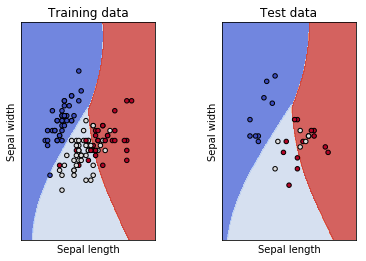

In [5]:
def plot_contours(ax, model, xx, yy, **params):
    """Biểu diễn biên quyết định của bộ phân lớp SVC.

    Tham số
    ----------
    ax: Đối tượng subplot của matplotlib
    clf: Bộ phân lớp
    xx: Tọa độ theo trục tung 
    yy: Tọa độ theo trục hoành
    params: Thư viện tham số ứng với hàm contourf
    """
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def make_meshgrid(x, y, h=.02):
    """Tạo ra lưới các điểm để biểu diễn

    Tham số
    ----------
    x: dữ liệu trên trục X
    y: dữ liệu trên trục Y
    h: kích cỡ một mắt lưới

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

# Cài đặt lưới 1x2 để biểu diễn dữ liệu
fig, sub = plt.subplots(1,2)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

titles = ['Training data', 'Test data']
datas = [X_train[:,:2], X_test[:,:2]]
labels = [y_train, y_test]

# huấn luyện mô hình với dữ liệu huấn luyện có 2 đặc trưng
model = svm.SVC()
model.fit(datas[0], labels[0])

for data, label, title, ax in zip(datas, labels, titles, sub.flatten()):
    # biểu diễn mô hình trong không gian 2 chiều
    X0, X1 = data[:, 0], data[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, model, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=label, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### Không gian giả thuyết
Trong quá trình huấn luyện mô hình, bất cứ thay đổi nào về tham số truyền vào (ví dụ như số lượng dữ liệu huấn luyện) cũng ảnh hưởng đến mô hình cuối cùng thu được. Mỗi mô hình như thế đại diện cho mộ giả thuyết. Tập hợp các mô hình có thể xem xét là lời giải ứng với ánh xạ $f(x)$ trong bài toán ban đầu là một không gian giả thuyết.

Từ không gian giả thuyết trên, ta phải tìm ra một lời giải hợp lý nhất (sát với hàm ánh xạ nhất). Cách đơn giản nhất là kiểm tra độ chính xác trên dữ liệu huấn luyện (training accuracy) và trên tập dữ liệu kiểm tra (validation accuracy).
\begin{align}Training\, Accuracy = \frac{No.true\_predicted\_labels}{No.training\_data}\end{align}

\begin{align}Validaton\, Accuracy = \frac{No.true\_predicted\_labels}{No.validation\_data}\end{align}

**Bài tập:** Tính toán độ chính xác trên tập huấn luyện và tập kiểm tra của mô hình phân lớp SVM trên.

In [6]:
# TODO: Tính độ chính xác trên tập huấn luyện và tập kiểm tra
y_pred_train = clf.predict(X_train)
train_acc = np.mean(y_pred_train == y_train)
val_acc = np.mean(y_pred == y_test)

print('Training accuracy: {}'.format(train_acc))
print('Validation accuracy: {}'.format(val_acc))

Training accuracy: 0.975
Validation accuracy: 1.0


Để minh họa cho không gian gả thuyết có thể có của mô hình `SVM`, chúng ta thay đổi tham số `kernel` của mô hình.

Kernel là một hàm nhân được sử dụng trong thuật toán, để làm tăng khả năng dự đoán chính xác dữ liệu. Kernel có thể nhận các giá trị: `'linear', 'poly', 'rbf', 'sigmoid'`. Giá trị mặc định của tham số `kernel` là `rbf`.

Bây giờ, chúng ta sẽ thử thay đổi tham số `kernel` với các giá trị có thể có của nó và tìm ra giả thuyết (mô hình) xấp xỉ tốt nhất với dữ liệu kiểm tra.

** Bài tập: ** Sử dụng vòng lặp để huấn luyện các mô hình với dữ liệu huấn luyện và tham số `kernel` khác nhau. Sau đó, chọn ra mô hình tốt nhất khi dự đoán dữ liệu kiểm tra.

In [7]:
# khởi tạo mảng chứa các tham số kernel
# best_svm, best_val_acc và best_kernel lần lượt là các biến lưu mô hình tốt nhất, 
# độ chính xác cao nhất trên tập kiểm tra và kernel tốt nhất
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_svm = None
best_val_acc = -1
best_kernel = None

for i in kernels:
    clf.kernel = i
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    train_acc = np.mean(y_pred_train == y_train)
    val_acc = np.mean(y_pred == y_test)
    print("validation accuracy: {} with kernel: {} ".format(val_acc,i))
    if val_acc>best_val_acc:
        best_svm = clf
        best_val_acc = val_acc
        best_kernel = i
    
    
# TODO: Huấn luyện các mô hình dựa trên dữ liệu huấn luyện và tham số kernel
#       Tính toán độ chính xác trên tập huấn luyện và tập kiểm tra để tìm được mô hình tốt nhất
# pass

# Hiển thị mô hình tốt nhất cùng với độ chính xác
print("Best validation accuracy : {} with kernel: {}".format(best_val_acc, best_kernel))    

# Mô hình tốt nhất của bạn nên có độ chính xác xấp xỉ 96,67%

validation accuracy: 1.0 with kernel: linear 
validation accuracy: 1.0 with kernel: poly 
validation accuracy: 1.0 with kernel: rbf 
validation accuracy: 0.23333333333333334 with kernel: sigmoid 
Best validation accuracy : 1.0 with kernel: linear
